In [1]:
!pip install -q kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adejun","key":"6a2384d63441708e87ac1e9ab2c488d6"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d imbikramsaha/food11

100% 517M/519M [00:24<00:00, 24.7MB/s]
100% 519M/519M [00:24<00:00, 21.9MB/s]


In [5]:
!unzip "/content/food11.zip"

Streaming output truncated to the last 5000 lines.
  inflating: food11/train/hamburger/2722745.jpg  
  inflating: food11/train/hamburger/272642.jpg  
  inflating: food11/train/hamburger/2726558.jpg  
  inflating: food11/train/hamburger/2738245.jpg  
  inflating: food11/train/hamburger/2745577.jpg  
  inflating: food11/train/hamburger/2745917.jpg  
  inflating: food11/train/hamburger/2754513.jpg  
  inflating: food11/train/hamburger/2756964.jpg  
  inflating: food11/train/hamburger/2762170.jpg  
  inflating: food11/train/hamburger/2766731.jpg  
  inflating: food11/train/hamburger/2771605.jpg  
  inflating: food11/train/hamburger/277584.jpg  
  inflating: food11/train/hamburger/2777938.jpg  
  inflating: food11/train/hamburger/2790429.jpg  
  inflating: food11/train/hamburger/279510.jpg  
  inflating: food11/train/hamburger/2797268.jpg  
  inflating: food11/train/hamburger/279729.jpg  
  inflating: food11/train/hamburger/2808308.jpg  
  inflating: food11/train/hamburger/281725.jpg  
  in

In [6]:
import tensorflow as tf
import os
dataset='food11/train'
test='food11/test'
apple_train=os.path.join(dataset,'apple_pie')
cheese_train=os.path.join(dataset,'cheesecake')
chicken_train=os.path.join(dataset,"chicken_curry")
french_train=os.path.join(dataset,'french_fries')
fried_train=os.path.join(dataset,"fried_rice")
hamburger_train=os.path.join(dataset,"hamburger")
hotdog_train=os.path.join(dataset,"hot_dog")
ice_train=os.path.join(dataset,"ice_cream")
omelette_train=os.path.join(dataset,"omelette")
pizza_train=os.path.join(dataset,'pizza')
sushi_train=os.path.join(dataset,"sushi")

In [7]:
print(len(os.listdir(apple_train)))
print(len(os.listdir(cheese_train)))
print(len(os.listdir(chicken_train)))
print(len(os.listdir(french_train)))
print(len(os.listdir(fried_train)))
print(len(os.listdir(hamburger_train)))
print(len(os.listdir(hotdog_train)))
print(len(os.listdir(ice_train)))
print(len(os.listdir(omelette_train)))
print(len(os.listdir(pizza_train)))
print(len(os.listdir(sushi_train)))


900
900
900
900
900
900
900
900
900
900
900


In [8]:
import keras.preprocessing #import modul keras

from keras.preprocessing.image import ImageDataGenerator #mengimport processing untuk gambar

In [9]:
DATABSE_IMAGE_train=dataset #meyiapkan folder utama
DATABSE_IMAGE_test=test

In [10]:
training_datagen=ImageDataGenerator(
    #proses augmentasi:
    rescale=1./255, #menormalisasi data
    #menerapkan skenario zoom gambar hingga sebnayak 0.2 dari ukuran asli
)
#pada data test, tidak perlu melakukan augmentasi karena dapat menyebabkan hasil evaluasi model yang bias

validation_datagen=ImageDataGenerator(
    #proses augmentasi:
    rescale=1./255, #menormalisasi data
    #menerapkan skenario zoom gambar hingga sebnayak 0.2 dari ukuran asli
)
#p

In [19]:
# generator untuk data training
train_generator=training_datagen.flow_from_directory(
    DATABSE_IMAGE_train, #folder target untuk digeneralisasi , harus menggunakan 1 sumber directori yang sama tidak boleh displit
    target_size=(300,300), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32, #semakin besar nilainya maka semakin cepat  prosesfit model
    class_mode='sparse'#menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
  

)

#generator untuk data validasi
validation_generator=validation_datagen.flow_from_directory(
    DATABSE_IMAGE_test, #folder target un tuk digeneralisasi, harus menggunakan 1 sumber directori yang sama tidak boleh displit
    target_size=(300,300), # mengubah resolusi gambar menjadi 150x150 piksel
    batch_size=32,
    class_mode='sparse' #menggunakan class categorical karena data label lebih dari 2 kelas yaitu batu gunting dan kertas, jika 2 kelas maka gunkana binary
    
    
)


Found 9900 images belonging to 11 classes.
Found 1100 images belonging to 11 classes.


In [21]:
model = tf.keras.models.Sequential([      #membentuk model sequential
    #konvolusi 1
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same',activation='relu', input_shape=(300, 300, 3)), #input shpe(imag_size,img_size,class (rgb(3)/grey(1)))
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),
   
    tf.keras.layers.Conv2D(64, (3,3),padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2),strides=2,padding='valid'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(),

   #hidden layer
    
    tf.keras.layers.Dense(128, activation='relu'), #hidden layer kedua dengan 128 neuron
    tf.keras.layers.Dense(128, activation='relu'), #hidden layer kedua dengan 128 neuron
   
   
    #output layer
    tf.keras.layers.Dense(11, activation='softmax') #sigmoid digunakan karena terdapat 2 kelas label yaitu batu,gunting,kertas

])


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 75, 75, 64)        0         
                                                                 
 batch_normalization (BatchN  (None, 75, 75, 64)       256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0

In [23]:
#callbacks
class Callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('sparse_categorical_accuracy')>0.95):
            print('\n Akurasi mencapai 95%')
            self.model.stop_training=True
stopTraining=Callback()

In [24]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), # loss function yang digunakan untuk klasifikasi ketegori lebih dari b2
              optimizer='adam',
              metrics=['sparse_categorical_accuracy']) #manmpilkan akurasi model training

In [25]:
history=model.fit(
    train_generator,
    batch_size=32,  
    callbacks=[stopTraining],
    epochs=100
    )

Epoch 1/100
310/310 [==============================] - 103s 316ms/step - loss: 2.8239 - sparse_categorical_accuracy: 0.1480
Epoch 2/100
310/310 [==============================] - 99s 317ms/step - loss: 2.2430 - sparse_categorical_accuracy: 0.2214
Epoch 3/100
310/310 [==============================] - 96s 310ms/step - loss: 2.1084 - sparse_categorical_accuracy: 0.2719
Epoch 4/100
310/310 [==============================] - 95s 306ms/step - loss: 1.9731 - sparse_categorical_accuracy: 0.3229
Epoch 5/100
310/310 [==============================] - 96s 309ms/step - loss: 1.8222 - sparse_categorical_accuracy: 0.3759
Epoch 6/100
310/310 [==============================] - 94s 303ms/step - loss: 1.6218 - sparse_categorical_accuracy: 0.4539
Epoch 7/100
310/310 [==============================] - 95s 304ms/step - loss: 1.3821 - sparse_categorical_accuracy: 0.5361
Epoch 8/100
310/310 [==============================] - 93s 299ms/step - loss: 1.1041 - sparse_categorical_accuracy: 0.6244
Epoch 9/100
310

In [ ]:
predictions=model.predict(validation_generator)
pred_label=
print(classification_report())

In [26]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model95.h5")
print("Saved model to disk")
 

Saved model to disk


In [27]:
from keras.models import save_model

# you can write whatever you desire instead of 'my_model'
# model = Your trained model
model.save('my_model_img_95')



In [28]:

# To load the model:

from keras.models import load_model

reconstructed_model = load_model("my_model_img_95")

Saving 647429.jpg to 647429.jpg
1/1 [==============================] - 0s 24ms/step
647429.jpg
array: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
cheesecake


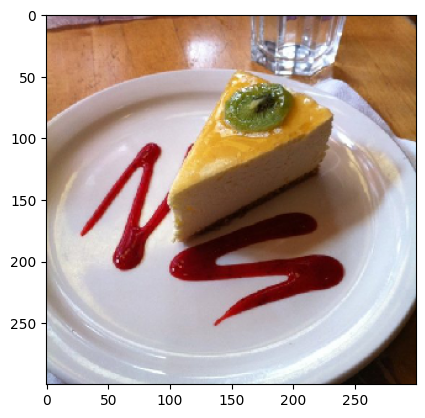

In [59]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(300,300))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
classes = model.predict(images, batch_size=10)


print(fn)

print("array:",classes)


if classes[0,0]==1:
  print('apple_pie')
elif classes[0,1]==1:
   print('cheesecake')
elif classes[0,2]==1:
   print('chicken_curry')
elif classes[0,3]==1:
   print('french_fries')
elif classes[0,4]==1:
   print('fried_rice')
elif classes[0,5]==1:
   print('hamburger')
elif classes[0,6]==1:
   print('hot_dog')
elif classes[0,7]==1:
   print('ice_cream')
elif classes[0,8]==1:
   print('omelette')
elif classes[0,9]==1:
   print('pizza')
else:
  print('Sushi')





In [ ]:
if classes==0:
  print('apple_pie')
elif classes==1:
   print('cheesecake')
elif classes==2:
   print('chicken_curry')
elif classes==3:
   print('french_fries')
elif classes==4:
   print('fried_rice')
elif classes==5:
   print('hamburger')
elif classes==6:
   print('hot_dog')
elif classes==7:
   print('ice_cream')
elif classes==8:
   print('omelette')
elif classes==9:
   print('pizza')
else:
  print('pizza')

